# Data Analytics II
### 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads (1).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [ ]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = pd.get_dummies(df, columns=['Gender'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_salary = scaler.fit_transform(df[['EstimatedSalary']])
df['EstimatedSalary'] = scaled_salary


In [ ]:
df.drop(['Gender_Male', 'User ID'], axis=1, inplace=True)

In [ ]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 22, train_size = 0.8)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(320, 3) (80, 3) (320,) (80,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR = logR.fit(x_train, y_train)

In [ ]:
y_pred = logR.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

Accuracy: 0.8875
Error rate: 0.11250000000000004
Precision: 0.8846153846153846
Recall: 0.7931034482758621
F1 score: 0.8363636363636363
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.88      0.79      0.84        29

    accuracy                           0.89        80
   macro avg       0.89      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



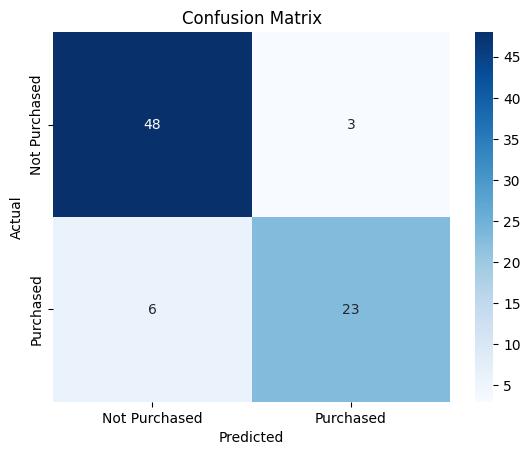

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Error rate:", 1 - accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Purchased', 'Purchased']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
